In [14]:
from export_film import *

In [15]:
0x19c, 228+0x19c

(412, 640)

In [21]:
for i in bin(0x87)[2:]:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [17]:
#v = VIPFile("SN00002.VIP", 0x0DF5B6A0, 10000)
v = VIPFile("SN00002.VIP", 0x20, 10000)
#v = VIPFile("SN00002.VIP", 0x18cc8d-8, 10000)

In [18]:
v.show_info(553,587, ["📼","🎨"] )

000553: [   580] 44 02 00 02 72 01 60 c0  🎨 
000554: [ 11971] c3 2e 02 0b 72 01 60 c0  📼   ->0 
000557: [ 10457] d9 28 02 0b 74 01 60 c0  📼   ->1 
000560: [ 10367] 7f 28 02 0b 76 01 60 c0  📼   ->1 
000563: [ 10256] 10 28 02 0b 78 01 60 c0  📼   ->1 
000566: [ 10280] 28 28 02 0b 7a 01 60 c0  📼   ->1 
000569: [ 10334] 5e 28 02 0b 7c 01 60 c0  📼   ->1 
000572: [ 10325] 55 28 02 0b 7e 01 60 c0  📼   ->1 
000575: [ 10406] a6 28 02 0b 80 01 60 c0  📼   ->1 
000578: [ 10445] cd 28 02 0b 82 01 60 c0  📼   ->1 
000581: [ 10493] fd 28 02 0b 84 01 60 c0  📼   ->1 
000584: [ 10487] f7 28 02 0b 86 01 60 c0  📼   ->1 


In [176]:
228*140

31920

In [114]:
maskaras = (
        (0,0,0,0),
(1,0,0,0),
(0,1,0,0),
(1,1,0,0),
(0,0,1,0),
(1,0,1,0),
(0,1,1,0),
(1,1,1,0),
(0,0,0,1),
(1,0,0,1),
(0,1,0,1),
(1,1,0,1),
(0,0,1,1),
(1,0,1,1),
(0,1,1,1),
(1,1,1,1)
)

In [126]:
with open("chunk_0xb1.frm","wb") as f:
    f.write( bytearray (v.get_chunk(557)))

In [143]:
0x112

274

In [166]:
def draw_frame_0b(chunk_id,last_frame):
    kdata = v.get_chunk(chunk_id)
    pos = 0
    vga_pos = 0
    if kdata[pos] == 0:
        print("es un 0!!!!")
        pos+=1
        while pos<len(kdata):
            colors = kdata[pos:pos+2]
            pos+=2
            maskara = kdata[pos] 
            pos+=1
            color = [ colors[i] for i in maskaras[maskara & 0x0f]]
            color2 = [ colors[i] for i in maskaras[(maskara & 0xf0)>>4]]
            last_frame[vga_pos:vga_pos+4]=color
            last_frame[vga_pos+228:vga_pos+228+4]=color2
            vga_pos+=4
            if vga_pos%228 == 0:
                vga_pos+=228
    else:
        print("es un 1!!!!")
        data_pos =0x1f3 + 1
        bitmap_pos = 1
        vga_pos=0
        nbits = 0
        while bitmap_pos<0x1f3+1:
            current_bitmap = kdata[bitmap_pos]
            bitmap_pos+=1
            #print(hex(current_bitmap))
            for bit in format(current_bitmap, '#010b')[2:]:
                if bit=="1":
                    nbits+=1
                    colors = kdata[data_pos:data_pos+2]
                    data_pos+=2
                    maskara = kdata[data_pos] 
                    data_pos+=1
                    color = [ colors[i] for i in maskaras[maskara & 0x0f]]
                    color2 = [ colors[i] for i in maskaras[(maskara & 0xf0)>>4]]
                    last_frame[vga_pos:vga_pos+4]=color
                    last_frame[vga_pos+228:vga_pos+228+4]=color2
                vga_pos+=4
                if vga_pos%228 == 0:
                    vga_pos+=228
            #print(hex(data_pos))
        print(nbits)

    
        

In [167]:
for bit in format(1, '#010b')[2:]:
    print(bit)

0
0
0
0
0
0
0
1


In [168]:
frame = [0] * 140*228



In [173]:
draw_frame_0b(557,frame)

es un 1!!!!
3318


In [174]:
img = v.apply_palette(v.get_palette(553),frame)

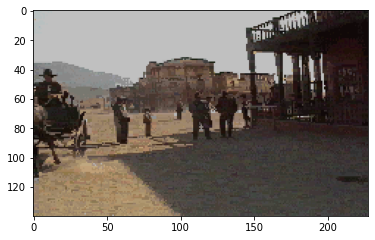

In [175]:
import matplotlib.pyplot as plt

plt.imshow(img)

es un 0!!!!


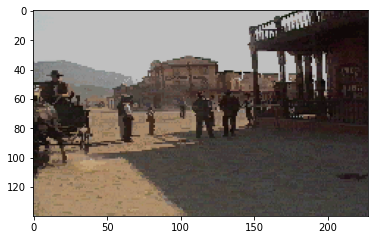

In [172]:
frame = [0] * 140*228
draw_frame_0b(554,frame)
img2 = v.apply_palette(v.get_palette(553),frame)
plt.imshow(img2)

total pixeles: 31920

In [ ]:
def draw_difference(self, last_frame, kdata):
        next_line = 0xE4
        # nos saltamos los 2 primeros bytes
        pos = 0
        num_parts = kdata[pos]
        pos += 1
        current_line = 0
        while num_parts != 0:
            num_lines = kdata[pos]
            # print(f'L:{num_lineas}')
            pos += 2
            while num_lines != 0:
                num_commands = kdata[pos]
                # print(f'\tC:{num_commands}')
                pos += 1
                draw_address = current_line
                while num_commands != 0:
                    draw_address += kdata[pos]
                    pos += 1
                    draw_type = kdata[pos]
                    pos += 1
                    repetitions = draw_type & 0x7F
                    repetitions += 1

                    # print(f'\t\tS:{desp_linea} T:{cuantas_veces}')
                    if draw_type <= 0x80:
                        for _ in range(repetitions):
                            color = kdata[pos]
                            pos += 1
                            # print(f'\t\t\tPA:{hex(color)}')
                            last_frame[draw_address] = color
                            draw_address += 1
                    else:
                        color = kdata[pos]
                        pos += 1
                        # print(f'\t\t\tP:{hex(color)}')
                        for _ in range(repetitions):
                            last_frame[draw_address] = color
                            draw_address += 1

                    num_commands -= 1
                num_lines -= 1
                current_line += next_line
            num_parts -= 1
        return last_frame

In [ ]:
data = list(v.get_chunk(857) )

In [ ]:
0xf801  

In [ ]:
63840/140

In [ ]:
36480/140


In [ ]:
228*140

In [ ]:
def draw_difference(last_frame, data):
    next_line = 0xE4
    kdata = list(data)
    # nos saltamos los 2 primeros bytes
    pos = 2
    num_parts = kdata[pos]
    pos += 2
    current_line = 0
    while num_parts != 0:
        num_lines = kdata[pos]
        # print(f'L:{num_lineas}')
        pos += 2
        while num_lines != 0:
            num_commands = kdata[pos]
            # print(f'\tC:{num_commands}')
            pos += 1
            draw_address = current_line
            while num_commands != 0:
                draw_address += kdata[pos]
                pos += 1
                draw_type = kdata[pos]
                pos += 1
                repetitions = draw_type & 0x7F
                repetitions += 1

                # print(f'\t\tS:{desp_linea} T:{cuantas_veces}')
                if draw_type <= 0x80:
                    for _ in range(repetitions):
                        color = kdata[pos]
                        pos += 1
                        # print(f'\t\t\tPA:{hex(color)}')
                        last_frame[draw_address] = color
                        draw_address += 1
                else:
                    color = kdata[pos]
                    pos += 1
                    # print(f'\t\t\tP:{hex(color)}')
                    for _ in range(repetitions):
                        last_frame[draw_address] = color
                        draw_address += 1

                num_commands -= 1
            num_lines -= 1
            current_line += next_line
        num_parts -= 1
    return last_frame

In [ ]:
data = v.get_chunk(857)
last_frame = [0] * (228*140)

In [ ]:
r = draw_difference(last_frame, data)

In [ ]:
len(r),len(last_frame)

In [ ]:
img=v.apply_palette(v.get_palette(856),r) 

In [ ]:
plt.imshow(img)

In [ ]:
v.show_info(0,20)

In [ ]:
v.show_info(50000,50001)

In [ ]:
d=None
with open("diff_4746","rb") as f:
    d = f.read()

In [ ]:
import numpy as np

In [ ]:
d = np.array(list(d),dtype="uint8")

In [ ]:
img=v.apply_palette(v.get_palette(4742),d) 

In [ ]:
plt.imshow(img)

In [ ]:
0xa0b7  